# Homework - Unsupervised Learning (College Dataset)

<img src="https://images-na.ssl-images-amazon.com/images/S/pv-target-images/b8a356f8325aa0d7b4d6b8bd7678f52702b1e00d8fb450ca161e3f97167e01ef._RI_.jpg" width="1000px">

Source: https://www.kaggle.com/flyingwombat/us-news-and-world-reports-college-data

## Name: Fariz Rizky Haykal Abdillah

## 1. Import Library & Dataset

In [433]:
#import library
import numpy as np
import pandas as pd #dataframe operation
import matplotlib.pyplot as plt #visualisasi
import seaborn as sns #visualisasi
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [434]:
# importing the dataset
df = pd.read_csv('College.csv',index_col=0)
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


## 2. Data Preprocessing

### 2.1 Check Missing Value & Duplicate Data

In [435]:
# Checking if there is any NULL data
df.isnull().sum()

Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [436]:
# Check Duplicate data
print("Is there any duplicate?",df.duplicated().any())
print("How many duplicate?",df.duplicated().sum())

Is there any duplicate? False
How many duplicate? 0


### 2.2 Encode Categorical Data

#### 2.2.1 Label Encoding

In [437]:
# Copy Dataframe before encode it for futher visualization
df_cp = df.copy()

In [438]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [439]:
# Peform label encoding for 'Private' feature
df['Private'] = labelencoder.fit_transform(df['Private'])

In [440]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


### 2.3 Data Description

In [441]:
# Show data description about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    int32  
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [442]:
# Show data description on statistic summary on each feature
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Private,777.0,0.727156,0.445708,0.0,0.0,1.0,1.0,1.0
Apps,777.0,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
Accept,777.0,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
Enroll,777.0,779.972973,929.176190,35.0,242.0,434.0,902.0,6392.0
Top10perc,777.0,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
Top25perc,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
F.Undergrad,777.0,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
P.Undergrad,777.0,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
Outstate,777.0,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
Room.Board,777.0,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0


## 3. Data Visualization

**Let's visualize the dataset to gain some insights**

### 3.1 Distribution of Features

In [443]:
# Define function for showing total number in graph
def showNumber(ax):
    for rect in ax.patches:
        # Find where everything is located
        height = rect.get_height()
        width = rect.get_width()
        x = rect.get_x()
        y = rect.get_y()

        # The width of the bar is the data value and can be used as the label
        label_text = int(height)  

        # ax.text(x, y, text)
        label_x = x + width / 2
        label_y = y + height / 2

        # plot only when height is greater than specified value
        if height > 0:
            ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=15)

In [444]:
# Exclude 'Private' feature for further visualization
numerical_no_private = df[df.columns.difference(['Private'])]

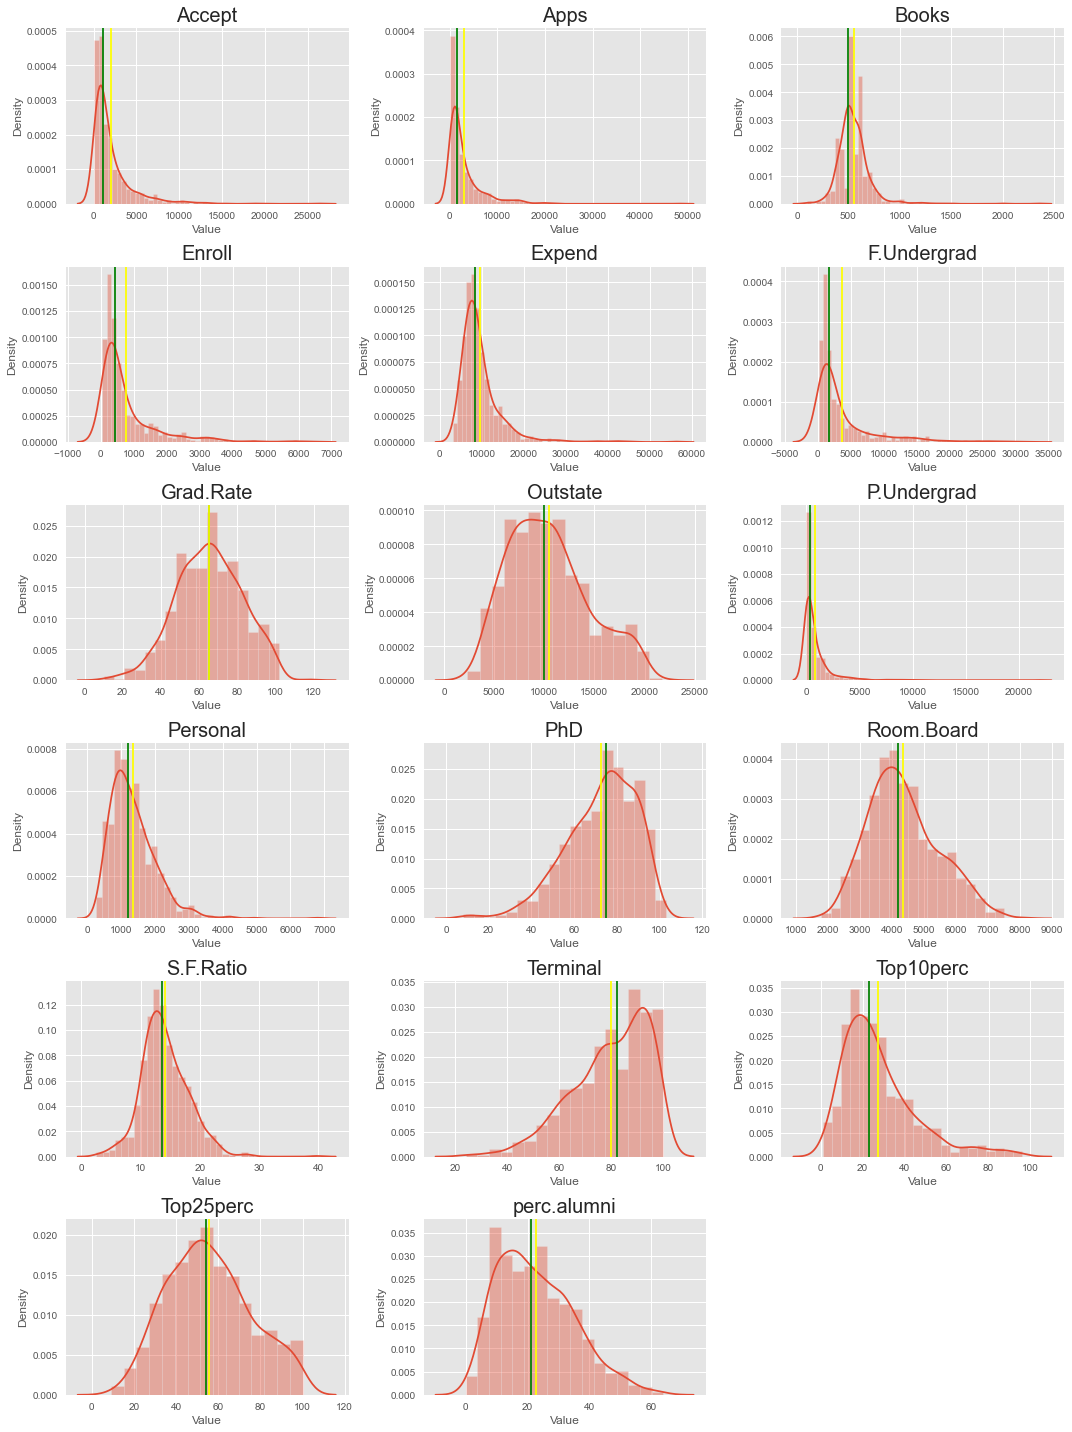

In [445]:
# Show distribution using distplot graph for every numerical feature execpt 'Private'
plt.figure(1, figsize=(15, 20))
for i, x in enumerate(numerical_no_private.columns):
    plt.subplot(6, 3, i+1)
    plt.tight_layout()
    sns.distplot(df[x])
    plt.title('{}'.format(x),fontsize=20)
    plt.xlabel('Value')
    plt.axvline(numerical_no_private[x].median(),color='green')
    plt.axvline(numerical_no_private[x].mean(),color='yellow')
plt.show()

- From the graph shows above, we can see the distribution of each feature using a displot. There are still some features that are left-skewed or right-skewed. The green vertical line represents the 'Median' and yellow is the 'Mean' of the feature, if the value of the feature Median < Mean means the feature is skewed to the right (right-skewed). However, if the Median value > Mean, it means that the feature is skewed to the left (left-skewed). This happens because there are several outliers that are represented on each feature that is different from the majority of the data.

<img src="https://www.statisticshowto.com/wp-content/uploads/2014/02/pearson-mode-skewness.jpg" width="500px">

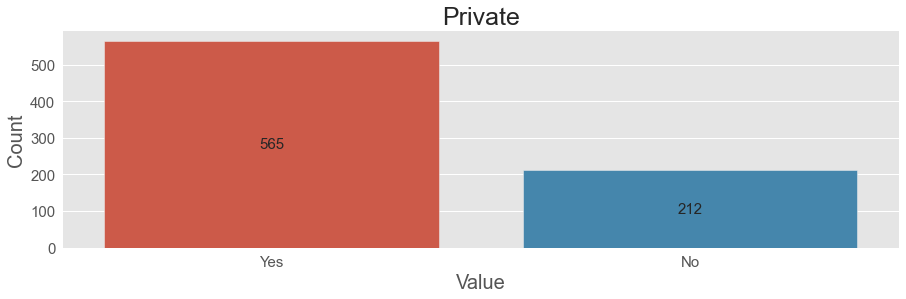

In [446]:
# Show total count in graph of 'Private' feature
plt.figure(1, figsize=(15, 4))
ax =sns.countplot(categorical['Private'])
plt.title('Private',fontsize=25)
plt.xlabel('Value', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(size=15)
plt.yticks(size=15)
showNumber(ax)
plt.show()

- The graph above shows that, the data has more private with 565 in total as compared to non-private universities with 212 in total.

### 3.2 Check Outliers

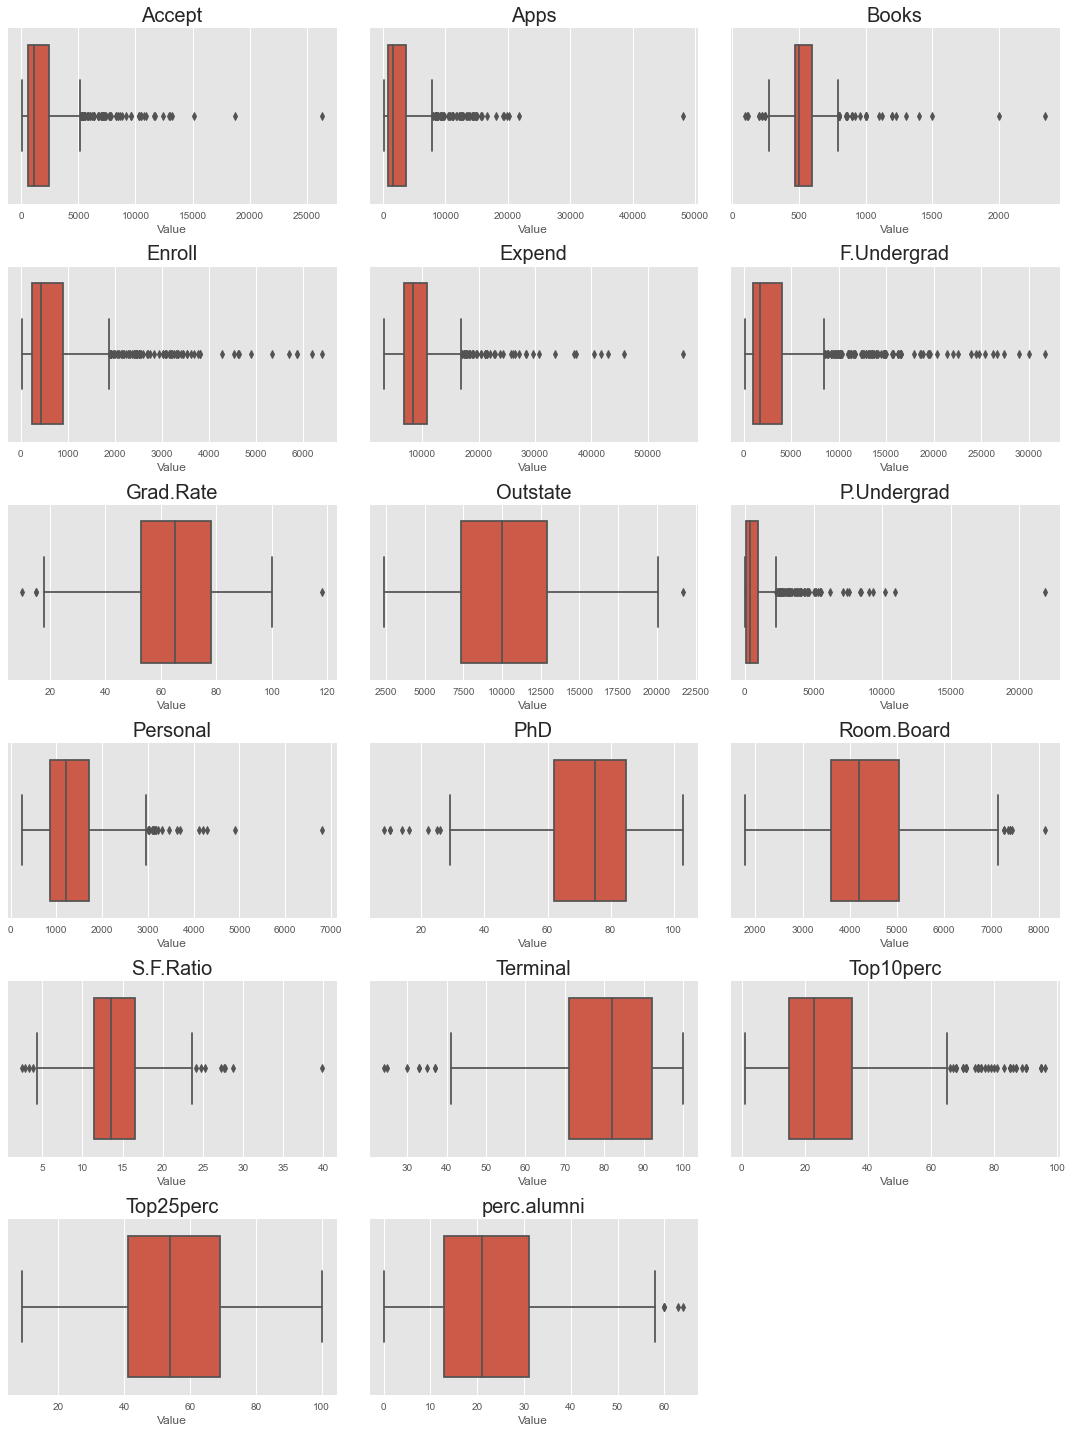

In [447]:
# Show outliers using boxplot for every numerical feature
plt.figure(1, figsize=(15, 20))
for i, x in enumerate(numerical_no_private.columns):
    plt.subplot(6, 3, i+1)
    plt.tight_layout()
    sns.boxplot(numerical_no_private[x])
    plt.title('{}'.format(x),fontsize=20)
    plt.xlabel('Value')
plt.show()

- The graph above shows each feature whether it has outliers or not using a boxplot where the outliers are in the form of points or dot.

### 3.3 Insights

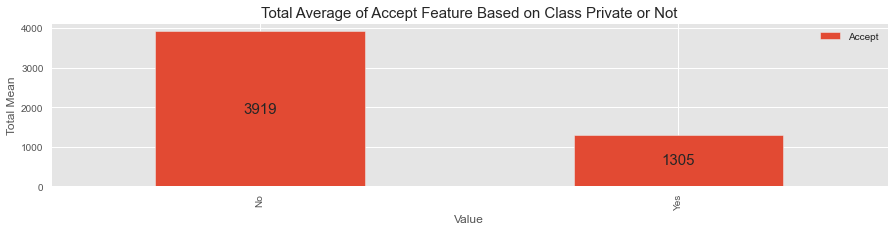

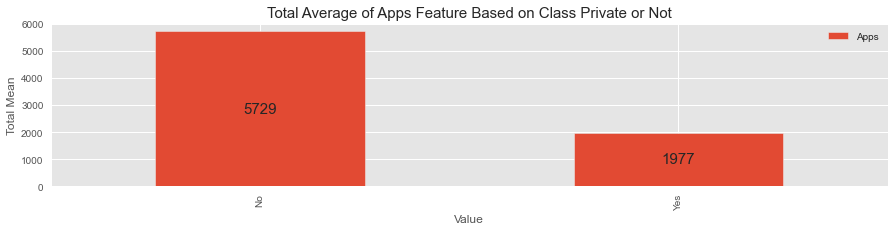

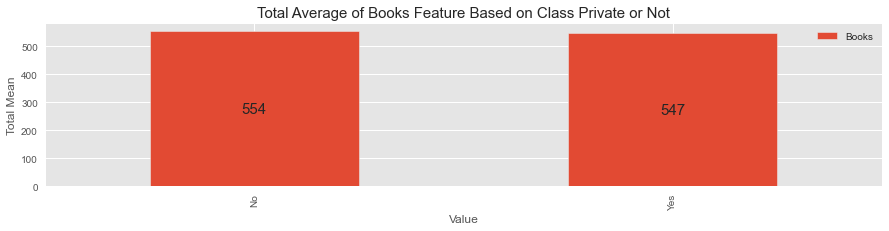

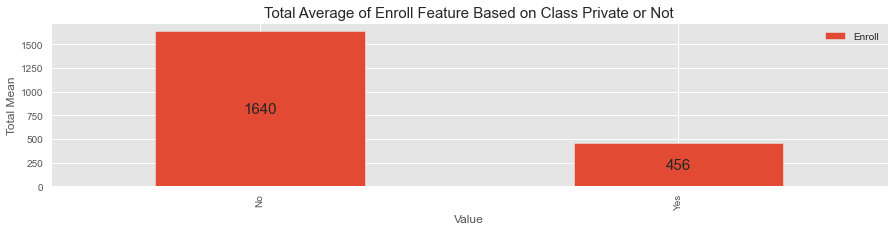

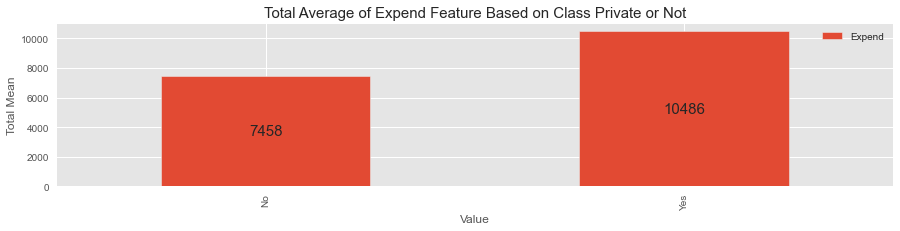

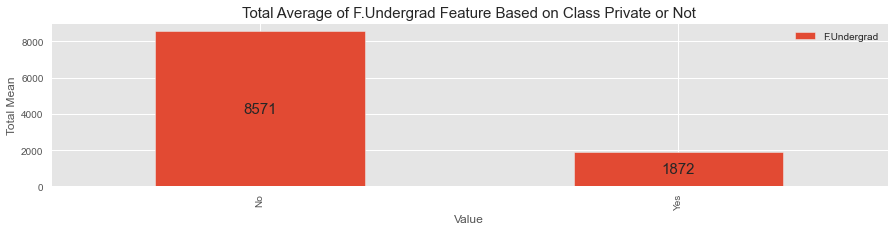

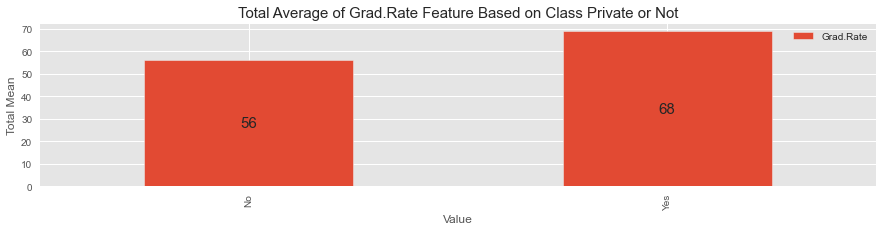

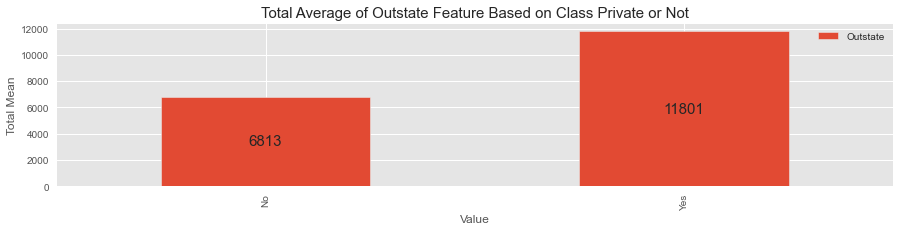

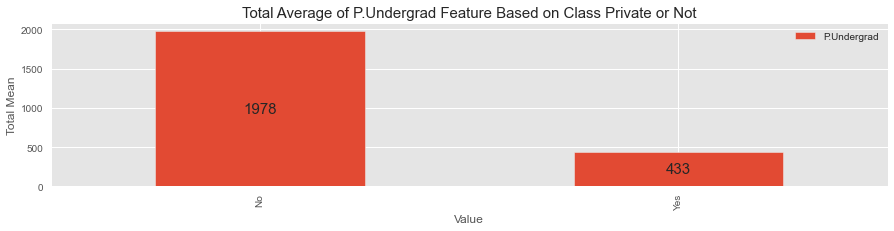

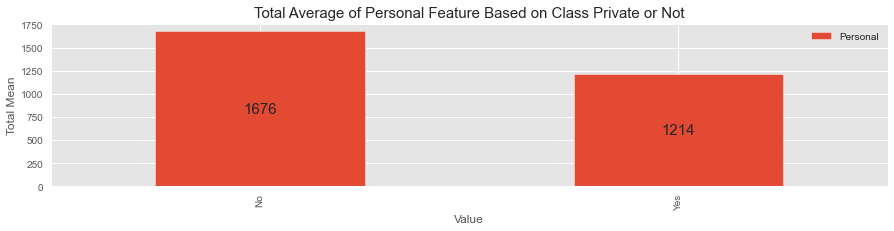

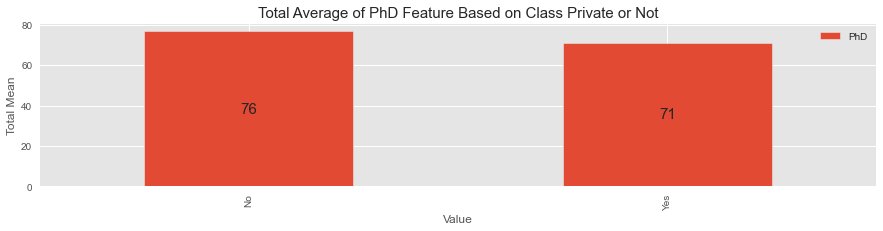

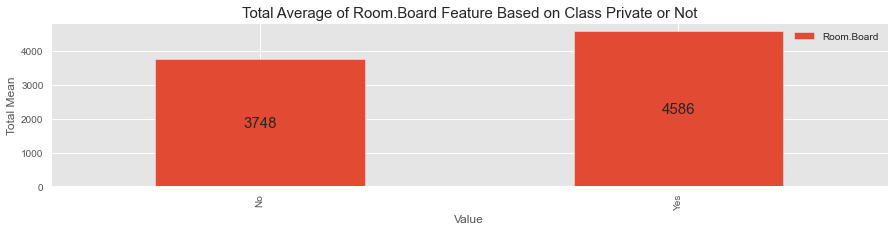

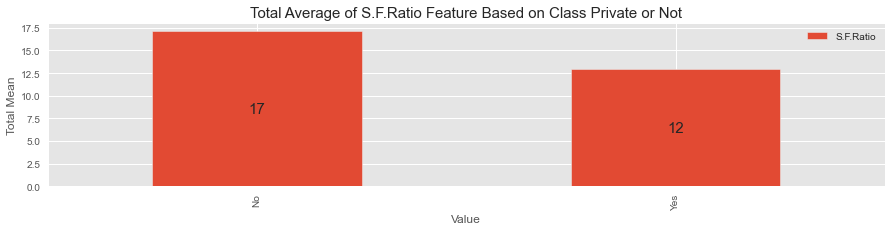

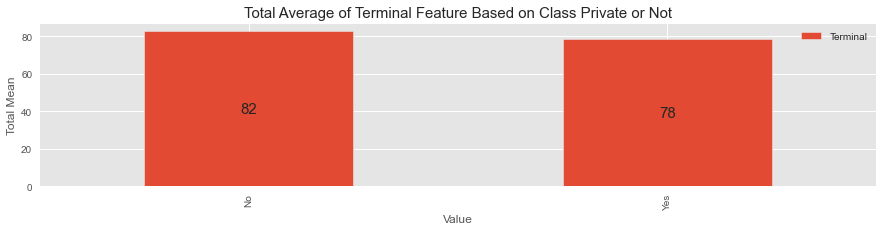

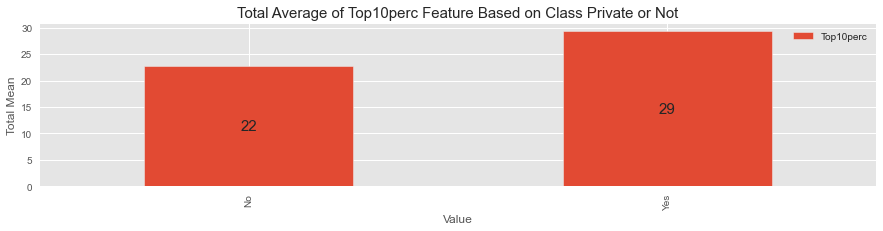

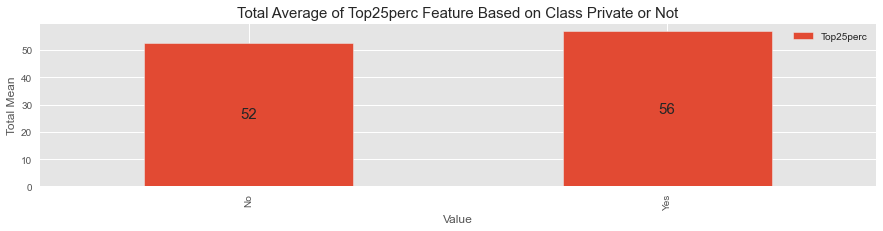

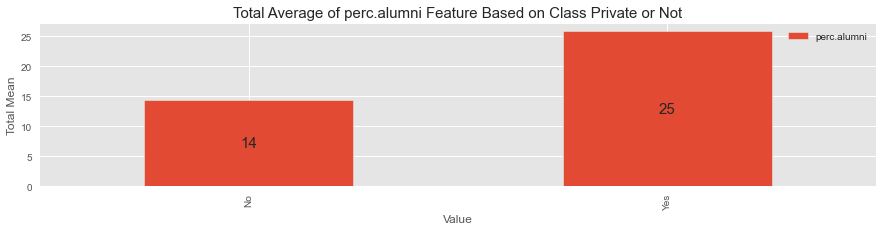

In [448]:
for x in numerical_no_private.columns:
    ax = pd.DataFrame(df_cp.groupby(['Private'])[x].mean())
    ax = ax.plot(kind='bar',figsize=(15,3),fontsize=10)
    plt.title('Total Average of {} Feature Based on Class Private or Not'.format(x),fontsize=15)
    plt.ylabel('Total Mean',fontsize=12)
    plt.xlabel('Value',fontsize=12)
    showNumber(ax)

- The graph shown above, shows the total mean of each feature and group by class 'Private' whether it is a private university or not using countplot.

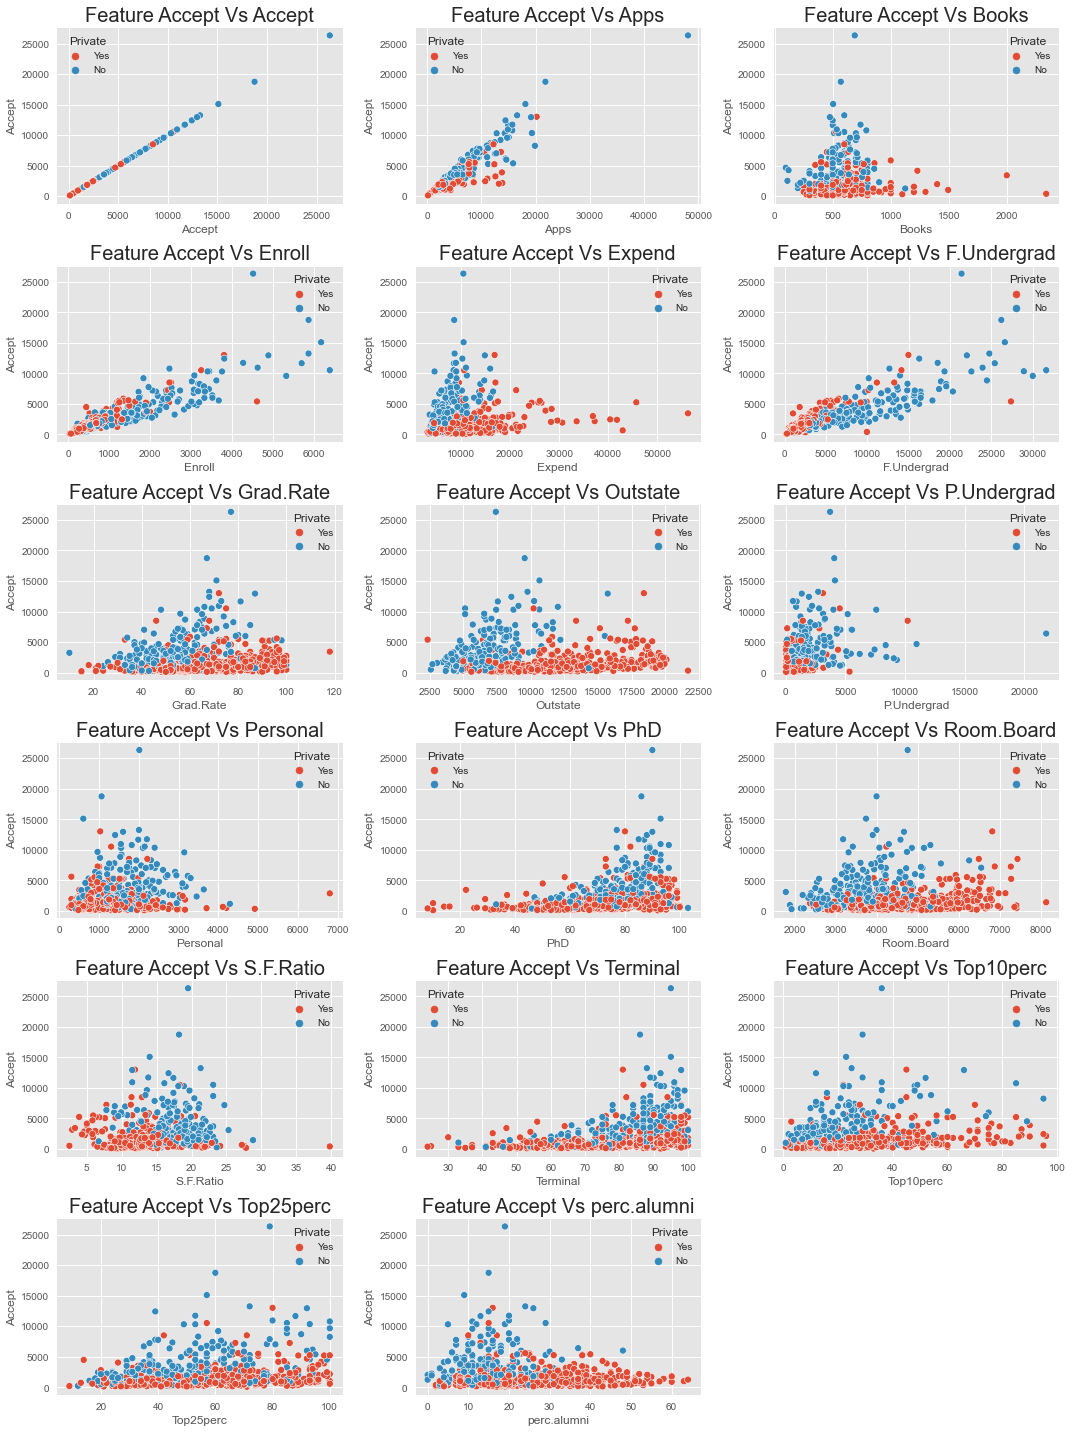

In [449]:
# Show distribution using scatterplot by comparing feature 'Accept' with the rest of the feature based on Private or not
plt.figure(1, figsize=(15, 20))
for i, x in enumerate(numerical_no_private.columns):
    plt.subplot(6, 3, i+1)
    plt.tight_layout()
    sns.scatterplot(data = df_cp, x=numerical_no_private[x],y='Accept',hue='Private')
    plt.title('Feature Accept Vs {}'.format(x),fontsize=20)
    plt.xlabel('{}'.format(x),fontsize=12)
    plt.ylabel('Accept',fontsize=12)
plt.show()

- The graph above, shows the distribution of data using a scatter plot of each feature and comparing it to the 'Accept' Feature based on Private university or not.

### 3.4 Correlation

<AxesSubplot:>

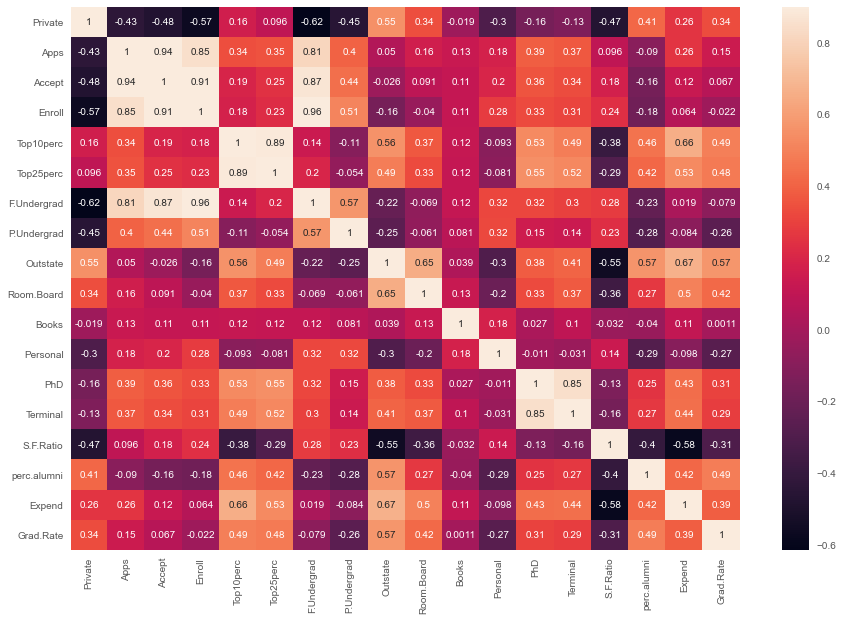

In [450]:
corr = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, vmax=0.9, annot=True)

- By using heatmap, we can see each correlation of the feature. There are some positive and negative correlation, if there is a positive correlation between two feature meaning whenever an increase in one variable is associated with a increase in the other. Meanwhile when there is a negative correlation meaning whenever an increase in one variable is associated with a decrease in the other.

In [451]:
df.corr()['Private'].sort_values()

F.Undergrad   -0.615561
Enroll        -0.567908
Accept        -0.475252
S.F.Ratio     -0.472205
P.Undergrad   -0.452088
Apps          -0.432095
Personal      -0.304485
PhD           -0.156714
Terminal      -0.129620
Books         -0.018549
Top25perc      0.095752
Top10perc      0.164132
Expend         0.258461
Grad.Rate      0.336162
Room.Board     0.340532
perc.alumni    0.414775
Outstate       0.552650
Private        1.000000
Name: Private, dtype: float64

- The score above shows the correlation of each feature with the 'Private' feature, the 'Outstate' feature has the most positive correlation with the 'Private' feature. Meanwhile 'F.Undergrad' has the most negative correlation with 'Personal' features.
- For 'Outstate' because it is positively correlated with 'Private' it means that every time the value of 'Outstate' increases, the value of 'Private' will also increase.
- For 'F.Undergrad' because it is negatively correlated with 'Private' it means that every time the value of 'F.Undergrad' increases, the value of 'Private' will decrease.

## 4. Clustering Analysis

In this step, we will try to make cluster from the dataset and try gain some insights from it. Some of the method to make cluster is by using 'K-Means Clustering' and Hierarchical Clustering

### 4.1 K-Means Clustering

#### 4.1.1 Select Features to be Cluster

In [452]:
# We can exclude 'Private' feature knowing it can be specify as target, but this problem will be classify as supervised learning.
# Therefore we can include the 'Private' feature to make this model case as unsupervised learning problem which has no label data or target.
# So all the features will be included for the model training process.
df_cluster = df
df_cluster.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


#### 4.1.2 Normalizing Data

- Knowing that each feature has a different unit of measurement, it is necessary to normalize the feature by scaling it using MinMaxScaler or Standard Scaler so that the model can classify the feature value as the same unit to train the model.
- In this case, I will use MinMax Scaler to transform each value in the column proportionally within the range [0,1]. Use this as the first scaler choice to transform a feature, as it will preserve the shape of the dataset (no distortion).

In [453]:
from sklearn import preprocessing
# Scaling the data
minmax_processed = preprocessing.MinMaxScaler().fit_transform(df_cluster)
df_cluster.columns

Index(['Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

In [454]:
df_numeric_scaled = pd.DataFrame(minmax_processed, index=df_cluster.index, columns=df_cluster.columns)

In [455]:
df_numeric_scaled.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,1.0,0.032887,0.044177,0.107913,0.231579,0.472527,0.087164,0.024548,0.263430,0.239596,0.157754,0.297710,0.652632,0.710526,0.418231,0.187500,0.072671,0.462963
Adelphi University,1.0,0.043842,0.070531,0.075035,0.157895,0.219780,0.080752,0.056148,0.513430,0.736129,0.291444,0.190840,0.221053,0.078947,0.260054,0.250000,0.138387,0.425926
Adrian College,1.0,0.028055,0.039036,0.047349,0.221053,0.450549,0.028473,0.004488,0.460227,0.310530,0.135472,0.139695,0.473684,0.552632,0.278820,0.468750,0.104605,0.407407
Agnes Scott College,1.0,0.006998,0.010549,0.016045,0.621053,0.879121,0.011776,0.002839,0.548554,0.578499,0.157754,0.095420,0.884211,0.960526,0.139410,0.578125,0.298415,0.453704
Alaska Pacific University,1.0,0.002333,0.002818,0.003146,0.157895,0.384615,0.003492,0.039753,0.269628,0.368852,0.313725,0.190840,0.715789,0.631579,0.252011,0.031250,0.145833,0.046296


#### 4.1.3 Find the Number of Optimal Clusters Using Elbow Method

- Next we need to find the optimal number of k or cluster to use for the model, we test it and check which cluster has the best score.

In [456]:
#Let's fit cluster size 1 to 20 on our data and take a look at the corresponding score value.
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]

In [457]:
score = [kmeans[i].fit(df_numeric_scaled).score(df_numeric_scaled) for i in range(len(kmeans))]

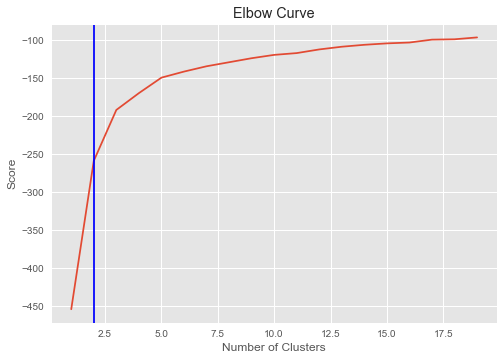

In [458]:
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.axvline(2,color='blue')
plt.show()

- From the result above, number of cluster that has the optimal score is at 2 represented in blue vertical line. We can identify the optimal score by the point after which the distortion/inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 2 which will be used for the value of k for K-Means Clustering.

#### 4.1.4 Evaluate the Goodness of the Cluster Using Silhouette Method

- In this step, we try to evaluate the goodness of the clustering technique based on the number of k or clusters. Using a silhoutte score, we try to compare which cluster gives the highest score.

In [459]:
# Collect the silhoutte score based on the number of cluster
from yellowbrick.cluster import SilhouetteVisualizer

s_score= []

for k in range (2, 20):
    model_sil = KMeans(n_clusters=k)
    model_sil.fit(df_numeric_scaled)
    label=model_sil.predict(df_numeric_scaled)
    s_score.append(silhouette_score(df_numeric_scaled, label))

In [460]:
# List of silhoutte score
s_score

[0.4497126968163958,
 0.3295247761406928,
 0.2975228729128128,
 0.251513423130095,
 0.193308956604317,
 0.16477484115444657,
 0.16288031742452064,
 0.16444459942855744,
 0.15969155728822293,
 0.1512563774756102,
 0.14214872825162825,
 0.1340567213558548,
 0.13256538996037248,
 0.13767547476501493,
 0.12376829587328367,
 0.1267737928107238,
 0.13479913060819676,
 0.1258288660260767]

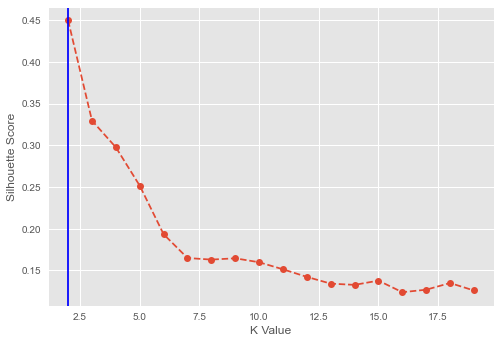

In [461]:
# Visualize the silhoutte score
plt.plot(range(2,20), s_score, 'o--')
plt.xlabel('K Value')
plt.ylabel('Silhouette Score')
plt.axvline(2,color='blue')

- Based on the results above, the model with a value of k or the number of clusters 2 represented in the blue vertical line gives the best score compared to the number of other clusters. Therefore, 2 will and should be used for the K-Means clustering model for k values.

#### 4.1.5 Fit the Model with Scaled Data

In [462]:
# Fit or train the model with the number of cluster or k is 2
km = KMeans(n_clusters = 2, random_state = 42)
cluster = km.fit_predict(df)

In [463]:
# To know position of centroids
km.cluster_centers_

array([[7.93721973e-01, 1.81323468e+03, 1.28716592e+03, 4.91044843e+02,
        2.53094170e+01, 5.34708520e+01, 2.18854858e+03, 5.95458894e+02,
        1.03957085e+04, 4.31136472e+03, 5.41982063e+02, 1.28033632e+03,
        7.04424514e+01, 7.78251121e+01, 1.40997010e+01, 2.31748879e+01,
        8.93204634e+03, 6.51195815e+01],
       [3.14814815e-01, 1.03631389e+04, 6.55089815e+03, 2.56972222e+03,
        4.14907407e+01, 7.02037037e+01, 1.30619352e+04, 2.46486111e+03,
        1.07191759e+04, 4.64347222e+03, 5.95212963e+02, 1.71420370e+03,
        8.63981481e+01, 9.13333333e+01, 1.40277778e+01, 2.00740741e+01,
        1.41705000e+04, 6.75925926e+01]])

In [464]:
# Add 'cluster' feature to the dataset
df_cluster = df
df_cluster['Cluster']=cluster

In [465]:
# Show updated dataset with 'Cluster' feature
df_cluster.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,0
Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,0
Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,0
Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,0
Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,0


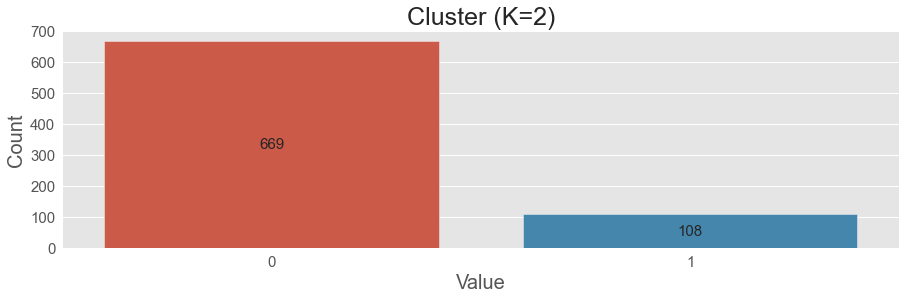

In [467]:
# Show total count in graph of 'Cluster' feature
plt.figure(1, figsize=(15, 4))
ax =sns.countplot(df_cluster['Cluster'])
plt.title('Cluster (K=2)',fontsize=25)
plt.xlabel('Value', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(size=15)
plt.yticks(size=15)
showNumber(ax)
plt.show()

- From the results above, the K-means clustering model is able to group the data into two clusters '0' and '1'. Cluster '0' has more total than cluster '1'.

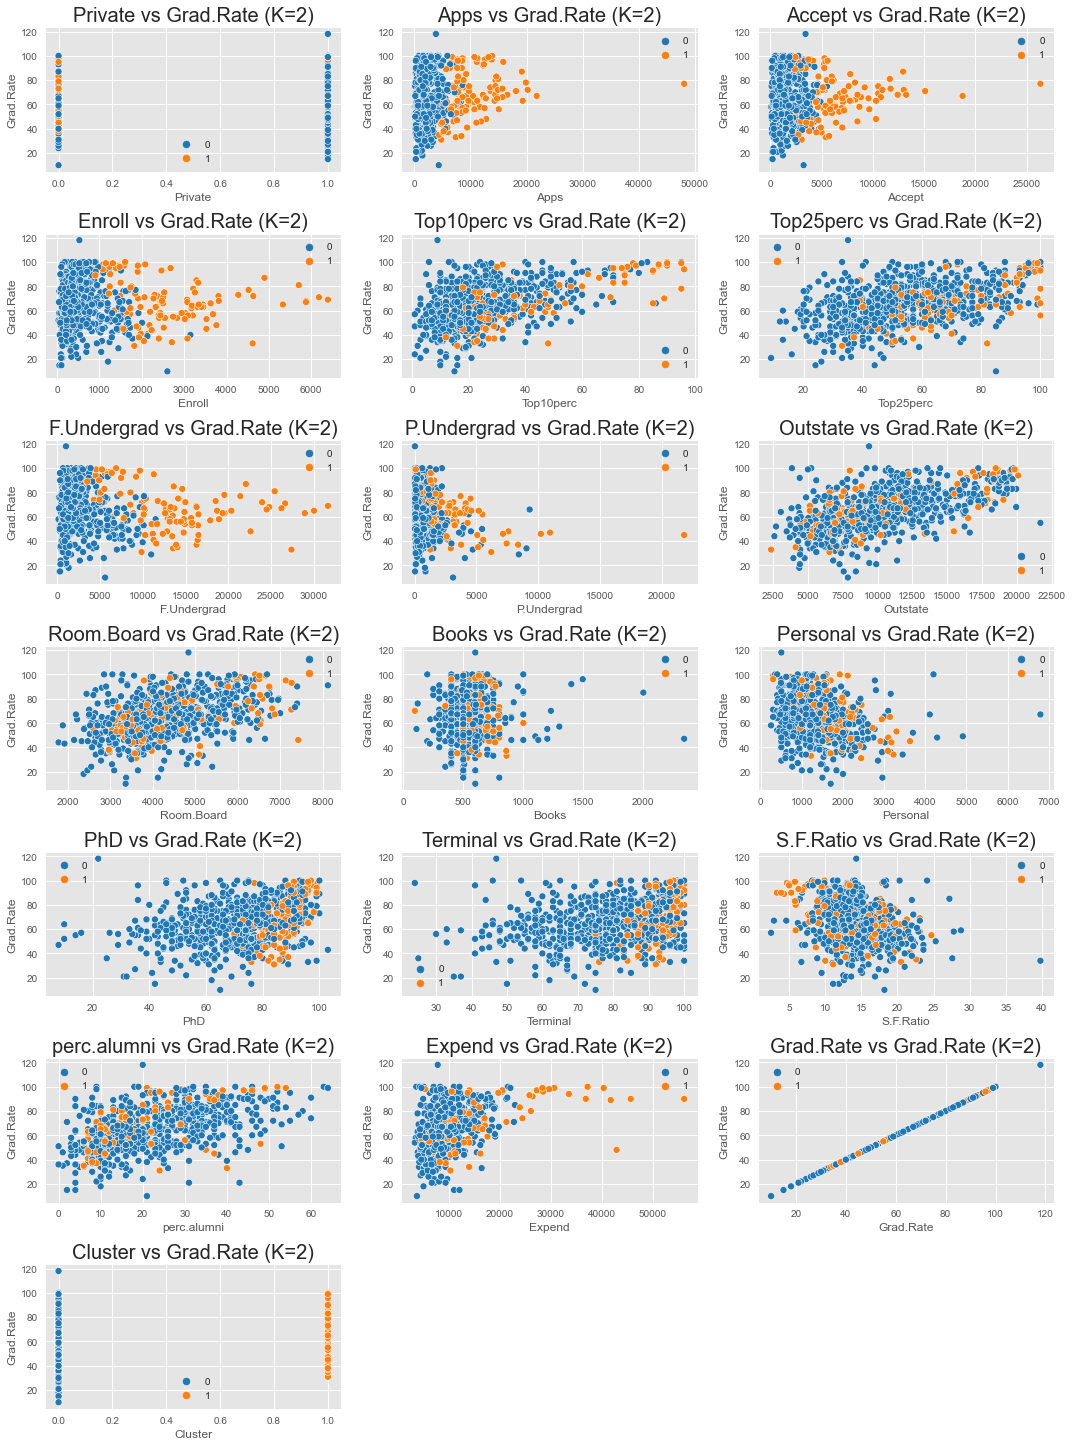

In [487]:
# Visualize the whole feature compare with 'Grad.Rate' feature
plt.figure(1, figsize=(15, 20))
for i, x in enumerate(df_cluster.columns):
    plt.subplot(7, 3, i+1)
    plt.tight_layout()
    sns.scatterplot(data=df_cluster, x=df_cluster[x],y='Grad.Rate', hue='Cluster', palette='tab10')
    plt.title('{} vs Grad.Rate (K=2)'.format(x), fontsize = 20)
    plt.xlabel('{}'.format(x),fontsize=12)
    plt.ylabel('Grad.Rate',fontsize=12)
    plt.legend()
plt.show()

- From the graph above using a scatterplot, it can be seen that each feature of the dataset is compared to the 'Grad.Rate' feature which is grouped as clusters '0' in blue and '1' in orange using K-Means Clustering. We can still compare with other features but it takes a lot of time and effort to do so. So to visualize it more clearly for us for the whole data set representation, we can first apply PCA to the data set and group it again using K-Means Clustering.

## 5. Clustering Visualization

- In this step, we want to visualize in a graph the clusters we found to see how the K-Means model results after grouping the data.

### 5.1 Dimension Reduction using PCA

- Since we are dealing with many features of a data set, it is impossible for us to visualize it in a single graph knowing that it has many dimensions to deal with. To reduce dimensions but still represent the entire feature and dataset, we can use Principal Component Analysis (PCA) to reduce the dimensions of the dataset by projecting the data to a lower dimensional subspace where we will only compress the data into only 2 dimensions for visualization.

In [468]:
# Import library
from sklearn.decomposition import PCA

# Compress the data to two dimension
pca=PCA(n_components=2)
principalComponents = pca.fit_transform(df_numeric_scaled)

In [469]:
# Result of pca
principalComponents

array([[-0.08279098, -0.26653438],
       [-0.22570859, -0.6310244 ],
       [-0.25037266, -0.31641835],
       ...,
       [-0.16467466, -0.16958294],
       [-0.74911009,  1.04631749],
       [-0.18227354, -0.1008658 ]])

In [470]:
# Store components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

In [472]:
# Result pca components in dataframe where it has only 2 dimensions
PCA_components.head()

,0,1
0,-0.082791,-0.266534
1,-0.225709,-0.631024
2,-0.250373,-0.316418
3,-0.509568,0.456092
4,-0.056116,-0.444180


### 5.2 Train & Visualize K-Means Model with PCA Data

- After the data dimensions are reduced to only 2, we can use this data to be trained with the K-Means Clustering model to be able to cluster with the optimal number of clusters where k=2 which is found using the second elbow method. Later we can visualize it with a scatter plot after we cluster and also shows where the centorid of each cluster is located.

In [473]:
# Set K-Means model with k=2
k_means_2=KMeans(n_clusters=2)

In [474]:
# Use the dataframe of PCA components to be cluster and train by the model
pca_clustered=k_means_2.fit_predict(PCA_components)

In [475]:
# Define color map of the data after we have set the 2 cluster from the PCA components dataframe
Label_color_map={0:'r',1:'b'}
label_color=[Label_color_map[i] for i in pca_clustered]

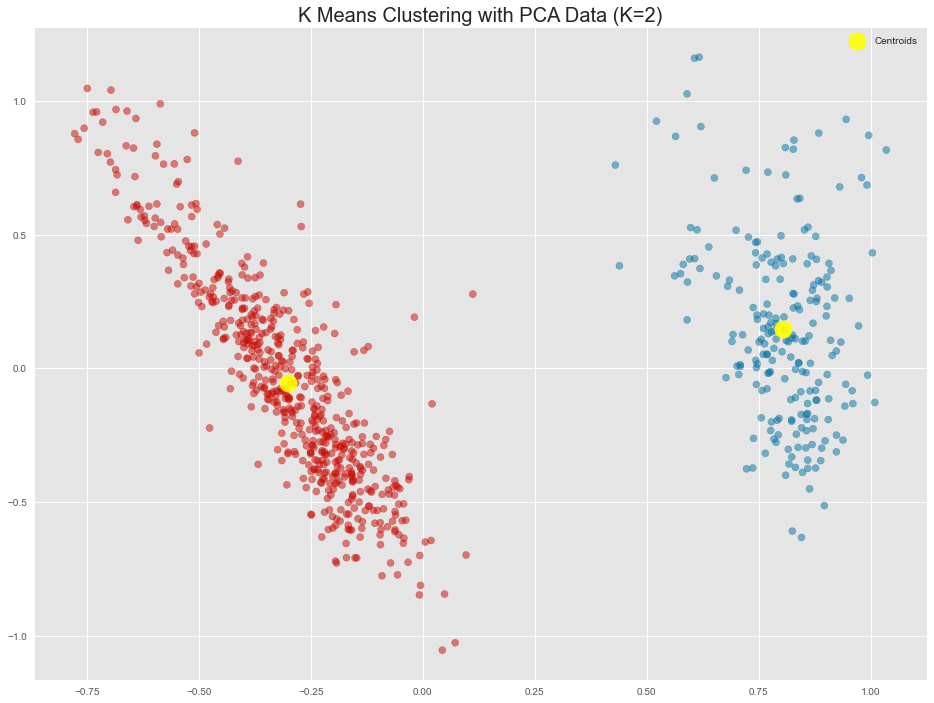

In [477]:
# Set the centroid

center=k_means_2.cluster_centers_ 

# Plot the scatter diagram

plt.figure(figsize=(16,12))
plt.scatter(principalComponents[:,0],principalComponents[:,1],c=label_color,alpha=0.5)
plt.scatter(center[:, 0], center[:, 1], c='yellow', s=300, alpha=0.9,label = 'Centroids')
plt.title('K Means Clustering with PCA Data (K=2)', fontsize = 20)
plt.legend()
plt.show()

- From the above results, we can see that there are two clusters representing points with different colors. Where Red color represents cluster '0' and Blue color represents cluster '1'. We can also see where the centroid actually lies in each cluster which is represented as a yellow circle.